In [1]:
import numpy as np 
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from math import ceil
from collections import OrderedDict
import copy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIRHIKAGURUMURTHY\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIRHIKAGURUMURTHY\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [3]:
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [4]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [word for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [5]:
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
def listtostr(s):
    str1=" "
    return (str1.join(s))

df['Text_stemmed'] = df['Text_cleaned'].apply(lambda x: stemming(x))
df['text_cleaned_str'] = df['Text_cleaned'].apply(lambda x: listtostr(x))

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized_stemmed'] = df['Text_stemmed'].apply(lambda x: lemmatizer(x))
df.head()

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ..."
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in..."
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea..."


In [6]:
first_pronouns = [
    'i', 'me', 'we', 'us',
    'myself', 'ourselves',
    'mine', 'my', 'our', 'ours'
]


def total_length(review):
    return len(review)


def avg_word_length(review):
    return ceil(sum(len(word) for word in review) / len(review) * 100) / 100.0


def capital_letters(review):
    count = 0
    for word in review:
        if not word.islower():
            count += 1
    return ceil(float(count / len(review)) * 100) / 100.0


def capital_words(review):
    count = 0
    for word in review:
        if word.isupper():
            count = count + 1
    return ceil(float(count / len(review)) * 100) / 100.0


def count_first_pronouns(review):
    count = 0
    for word in review:
        if word.lower() in first_pronouns:
            count += 1
    return count

In [7]:
def wordcloud(text):
     wordcloud=WordCloud().generate(text)
     plt.imshow(wordcloud, interpolation='bilinear')
     plt.axis("off")

str1=""
df['text_cleaned_str']

0       stayed one night getaway family thursday tripl...
1       triple rate upgrade view room less also includ...
2       comes little late im finally catching reviews ...
3       omni chicago really delivers fronts spaciousne...
4       asked high floor away elevator got room pleasa...
                              ...                        
1595    problems started booked intercontinental chica...
1596    amalfi hotel beautiful website interior decora...
1597    intercontinental chicago magnificent mile outs...
1598    palmer house hilton looks good pictures outsid...
1599    former chicagoan im appalled amalfi hotel chic...
Name: text_cleaned_str, Length: 1600, dtype: object

(-0.5, 399.5, 199.5, -0.5)

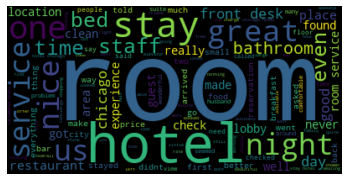

In [8]:
wordcloud2 = WordCloud().generate(' '.join(df['text_cleaned_str']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [9]:
df['total_length'] = df['text'].apply(lambda x: total_length(x))
df['capital_letters'] = df['text'].apply(lambda x: capital_letters(x))
df['capital_words'] = df['text'].apply(lambda x: capital_words(x))
df['first_pronouns'] = df['text'].apply(lambda x: count_first_pronouns(x))
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21


In [10]:
def POS_Tagging(sentence):
    tagged_list = []
    tags = []
    count_verbs = 0
    count_nouns = 0
    text=nltk.word_tokenize(sentence)
    tagged_list = (nltk.pos_tag(text))
    
    tags = [x[1] for x in tagged_list]
    for each_item in tags:
        if each_item in ['VERB','VB','VBN','VBD','VBZ','VBG','VBP']:
            count_verbs+=1
        elif each_item in ['NOUN','NNP','NN','NUM','NNS','NP','NNPS']:
            count_nouns+=1
        else:
            continue
    return (count_verbs/count_nouns)

In [12]:
df['nouns_verbs__count'] = df['text'].apply(lambda x: POS_Tagging(x))
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns,nouns_verbs__count
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23,0.387097
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18,0.333333
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61,0.549020
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42,0.311111
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41,0.675676
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38,0.961538
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44,0.621622
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21,0.947368


In [14]:
from afinn import Afinn
afinn = Afinn(language='en')
df['afinn_score'] = df['text'].apply(afinn.score)
df['afinn_score'].describe()


count    1600.000000
mean       10.091250
std        12.681717
min       -41.000000
25%         1.000000
50%        10.000000
75%        18.000000
max        77.000000
Name: afinn_score, dtype: float64

In [15]:
def word_count(text_string):
    return len(text_string.split())
df['word_count'] = df['text'].apply(word_count)

In [16]:
df['afinn_adjusted'] = df['afinn_score'] / df['word_count'] * 100

In [17]:
df['afinn_adjusted_abs'] = df['afinn_adjusted'].abs()
df.groupby('deceptive')['afinn_adjusted_abs'].describe()

,count,mean,std,min,25%,50%,75%,max
deceptive,,,,,,,,
deceptive,800.0,11.474593,9.671649,0.0,3.549247,8.571429,17.647059,65.714286
truthful,800.0,10.467687,9.223371,0.0,3.093125,8.139535,15.466986,50.943396


In [18]:
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns,nouns_verbs__count,afinn_score,word_count,afinn_adjusted,afinn_adjusted_abs
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23,0.387097,7.0,105,6.666667,6.666667
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18,0.333333,7.0,45,15.555556,15.555556
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61,0.549020,16.0,207,7.729469,7.729469
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42,0.311111,10.0,127,7.874016,7.874016
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26,1.142857,9.0,72,12.500000,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41,0.675676,-5.0,131,-3.816794,3.816794
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38,0.961538,16.0,121,13.223140,13.223140
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44,0.621622,17.0,141,12.056738,12.056738
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21,0.947368,-1.0,86,-1.162791,1.162791


In [23]:
x_dt=df[['total_length','capital_letters','capital_words','first_pronouns','nouns_verbs__count','afinn_adjusted_abs']]
y_dt=df[['deceptive']]

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_dt, y_dt, test_size=0.3, random_state=1)

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6041666666666666


In [36]:
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True)

In [92]:
x = vectorizer.fit_transform(df.text)
x
df1=pd.DataFrame(x.toarray())
x_new=pd.concat([x_dt,df1],axis=1)
#x_new=df1

In [93]:
#x_new=df[['textvect','total_length','capital_letters','capital_words','first_pronouns','nouns_verbs__count','afinn_adjusted_abs']]
y_new=df[['deceptive']]

In [94]:
X_tr, X_tes, y_tr, y_tes = train_test_split(x_new, y_new, test_size=0.3, random_state=1)

In [147]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# Train Decision Tree Classifer
clf1 = clf.fit(X_tr,y_tr)

#Predict the response for test dataset
y_pred_new = clf1.predict(X_tes)

In [148]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_tes, y_pred_new))

Accuracy: 0.70625


In [97]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_tr, y_tr)

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
svc.score(X_tes, y_tes)

0.475

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rf.score(X_tes, y_tes)

0.8520833333333333

In [124]:
Sentiment_Word_list = []
for line in open("sentiment_list.txt" ,encoding="utf-8").readlines():
    if line.strip():
        word_split = line.split()
        Sentiment_Word_list.append(word_split[0])
Sentiment_Word_list

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [121]:
def count_sentiment(text):
    count=0
   # text=text.lower()
    for word in text:
        if word in Sentiment_Word_list:
            count=count+1
    return count
        
    

In [125]:
df['senti_count'] = df['Text_cleaned'].apply(lambda x: count_sentiment(x))
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns,nouns_verbs__count,afinn_score,word_count,afinn_adjusted,afinn_adjusted_abs,textvect,senti_count
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23,0.387097,7.0,105,6.666667,6.666667,"(0, 1686)\t0.036879354891874716\n (0, 3744)...",9
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18,0.333333,7.0,45,15.555556,15.555556,"(0, 1057)\t0.0876334073156528\n (0, 1880)\t...",2
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61,0.549020,16.0,207,7.729469,7.729469,"(0, 6638)\t0.06737291338672023\n (0, 2794)\...",16
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42,0.311111,10.0,127,7.874016,7.874016,"(0, 6561)\t0.10156009437265662\n (0, 9314)\...",7
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26,1.142857,9.0,72,12.500000,12.500000,"(0, 2716)\t0.22608499415517835\n (0, 3028)\...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41,0.675676,-5.0,131,-3.816794,3.816794,"(0, 6630)\t0.14737467426743914\n (0, 78)\t0...",10
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38,0.961538,16.0,121,13.223140,13.223140,"(0, 2334)\t0.19458406836983116\n (0, 7256)\...",9
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44,0.621622,17.0,141,12.056738,12.056738,"(0, 2139)\t0.1692944996421234\n (0, 4859)\t...",15
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21,0.947368,-1.0,86,-1.162791,1.162791,"(0, 7337)\t0.237685743401137\n (0, 2642)\t0...",6


In [127]:
x_sen=df[['senti_count','total_length','capital_letters','capital_words','first_pronouns','nouns_verbs__count','afinn_adjusted_abs']]
x_new_sen=pd.concat([x_sen,df1],axis=1)
y_sen=df[['deceptive']]

In [129]:
X_train_sen, X_test_sen, y_train_sen, y_test_sen = train_test_split(x_new_sen, y_sen, test_size=0.3, random_state=1)

In [150]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf2 = clf2.fit(X_train_sen,y_train_sen)
#Predict the response for test dataset
y_pred_sen = clf2.predict(X_test_sen)

In [151]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_sen, y_pred_sen))

Accuracy: 0.70625


In [152]:
rf = RandomForestClassifier()
rf.fit(X_train_sen, y_train_sen)
y_pred_rf = rf.predict(X_test_sen)

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [154]:
rf.score(X_test_sen, y_test_sen)

0.84375

In [138]:
from sklearn import naive_bayes,svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [ ]:
SVM.fit(X_train_sen,y_train_sen)

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
predictions_SVM = SVM.predict(X_test_sen)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test_sen)*100)

SVM Accuracy Score ->  85.83333333333333


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test_sen,y_pred_sen))
print(classification_report(y_test_sen,y_pred_sen))
print(accuracy_score(y_test_sen,y_pred_sen))

[[167  85]
 [ 56 172]]
              precision    recall  f1-score   support

   deceptive       0.75      0.66      0.70       252
    truthful       0.67      0.75      0.71       228

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

0.70625


In [155]:
print(confusion_matrix(y_test_sen,y_pred_rf))
print(classification_report(y_test_sen,y_pred_rf))
print(accuracy_score(y_test_sen,y_pred_rf))

[[211  41]
 [ 34 194]]
              precision    recall  f1-score   support

   deceptive       0.86      0.84      0.85       252
    truthful       0.83      0.85      0.84       228

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480

0.84375
